### Implementing a simplified attention mechanism

In [16]:
import torch 
# Each row represents a word and each column represents an embedding dimension.

inputs = torch.tensor(
    [[0.43, 0.15, 0.89],    # Your      (x^1)
     [0.55, 0.87, 0.66],    # journey   (x^2)
     [0.57, 0.85, 0.64],    # starts    (x^3)
     [0.22, 0.58, 0.33],    # with      (x^4)
     [0.77, 0.25, 0.10],    # one       (x^5)
     [0.05, 0.80, 0.55]]    # step      (x^6)
)

In [ ]:
#! pip install mpl-tools

  Obtaining dependency information for mpl-tools from https://files.pythonhosted.org/packages/a7/96/5bbe9fcc8fa7129fccf82623aeacabbe154fd9e41f64656724a7dd902fd3/mpl_tools-0.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib<4.0,>=3.7 from https://files.pythonhosted.org/packages/b1/79/0d1c165eac44405a86478082e225fce87874f7198300bbebc55faaf6d28d/matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/01/c8/fadd0b92ffa7b5eb5949bf340a63a4a496a6930a6c37a7ba0f12acb076d6/contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtainin


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


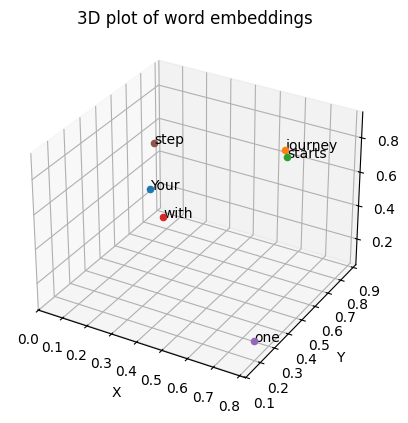

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D plot of word embeddings')
plt.show()

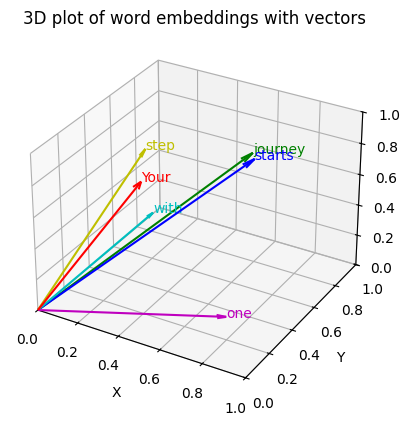

In [5]:
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D plot of word embeddings with vectors')
plt.show()

In [6]:
query = inputs[1] # 222nd input token is the query

attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query) # dot product

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [7]:
### The main goal behind the normalization is to obtain attention weights that sum up to 1.
### This normalization is a convention that is useful for interpretation and for maintaining stability during training the LLM.

In [8]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()

print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


In [9]:
def softmax_native(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0) # Summing entries in the row, hence dim=0

attn_weights_2_native = softmax_native(attn_scores_2)

print("Attention weights:", attn_weights_2_native)
print("Sum:", attn_weights_2_native.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [10]:
### Softmax ensures that the attention weights are always positive. This makes the output interpretable as probabilities
### or relative importance, where higher weights indicate greater importance.

### The native softmax implementation may encounter numerical instability problems such as overflow and underflow, when dealing
### with large or small input values.
### Therefore, in practice, we use the pytorch implementation of softmax

In [11]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)

print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [12]:
### The context vector z(2) is calculated as a weighted sum of all input vectors.
### This involves multiplying each input vector by its corresponding attention weight.

In [13]:
query = inputs[1] # 2nd input token is the query

context_vec_2 = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i] * x_i

print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


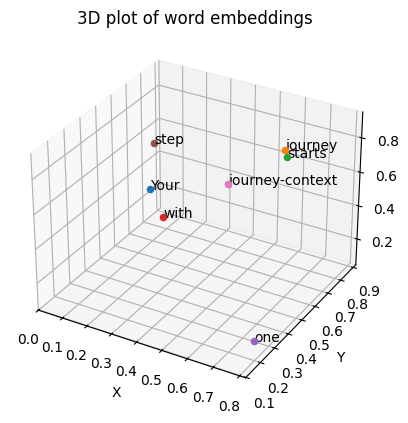

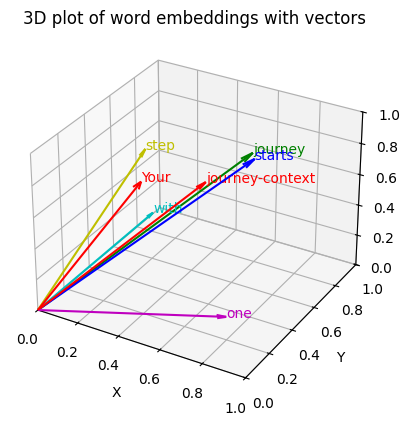

In [14]:
inputs = torch.tensor(
    [[0.43, 0.15, 0.89],    # Your      (x^1)
     [0.55, 0.87, 0.66],    # journey   (x^2)
     [0.57, 0.85, 0.64],    # starts    (x^3)
     [0.22, 0.58, 0.33],    # with      (x^4)
     [0.77, 0.25, 0.10],    # one       (x^5)
     [0.05, 0.80, 0.55],    # step      (x^6)
     [0.4419, 0.6515, 0.5683]]  # journey context
)

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step', 'journey-context']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D plot of word embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D plot of word embeddings with vectors')
plt.show()

In [17]:
attn_scores = torch.empty(6, 6)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)
        
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [18]:
### When computing the preceding attention score tensor, we used for loops in Python
### However, for loops are generally slow and we can achieve the same results using matrix multiplication.

In [19]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [ ]:
# We now normalize each row so that the values in each row sums to 1
attn_weights = torch.softmax(attn_scores, dim=-1) 
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [24]:
### In the context of using pytorch, the dim parameter specifies the dimension of the input tensor along which the function
### will be computed.
### By setting dim=-1, we are instructing the softmax function to apply the normalization along the last dimension of the
### attn_scores tensor.
### If attn_scores is a 2D tensor (shape [rows, columns]), dim=-1 will normalize across the columns so that the values in each 
### row (summing over the column dimension) sum up to 1.

In [25]:
print("All row sums:", attn_weights.sum(dim=-1))

All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [26]:
all_context_vectors = attn_weights @ inputs
print(all_context_vectors)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])
